In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

pd.set_option("display.max_columns", None)
plt.style.use('seaborn-v0_8')

# Load cleaned dataset
df = pd.read_csv("../data_processed/cleaned_customers.csv")

print("✅ Data loaded successfully!")
print("Shape:", df.shape)
df.head()
#IMPORT AND LOAD DATA

✅ Data loaded successfully!
Shape: (10127, 20)


,Customer_ID,Age,Gender,Dependents,Education,MaritalStatus,Income,CardType,Tenure,RelationshipCount,InactiveMonths,ContactsLast12M,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,TotalTransactionAmount,TotalTransactionCount,TransactionChangeRatio,AvgUtilization
0,768805383,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [3]:
df.info()
print("\nMissing values:\n", df.isna().sum())
print("\nDuplicate rows:", df.duplicated().sum())
df.describe()
#BASIC STRUCTURE CHECK


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer_ID             10127 non-null  int64  
 1   Age                     10127 non-null  int64  
 2   Gender                  10127 non-null  object 
 3   Dependents              10127 non-null  int64  
 4   Education               10127 non-null  object 
 5   MaritalStatus           10127 non-null  object 
 6   Income                  10127 non-null  object 
 7   CardType                10127 non-null  object 
 8   Tenure                  10127 non-null  int64  
 9   RelationshipCount       10127 non-null  int64  
 10  InactiveMonths          10127 non-null  int64  
 11  ContactsLast12M         10127 non-null  int64  
 12  Credit_Limit            10127 non-null  float64
 13  Total_Revolving_Bal     10127 non-null  int64  
 14  Avg_Open_To_Buy         10127 non-null

,Customer_ID,Age,Dependents,Tenure,RelationshipCount,InactiveMonths,ContactsLast12M,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,TotalTransactionAmount,TotalTransactionCount,TransactionChangeRatio,AvgUtilization
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000



🔹 Gender distribution:
Gender
F    5358
M    4769
Name: count, dtype: int64


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_3752\4033644121.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="coolwarm")


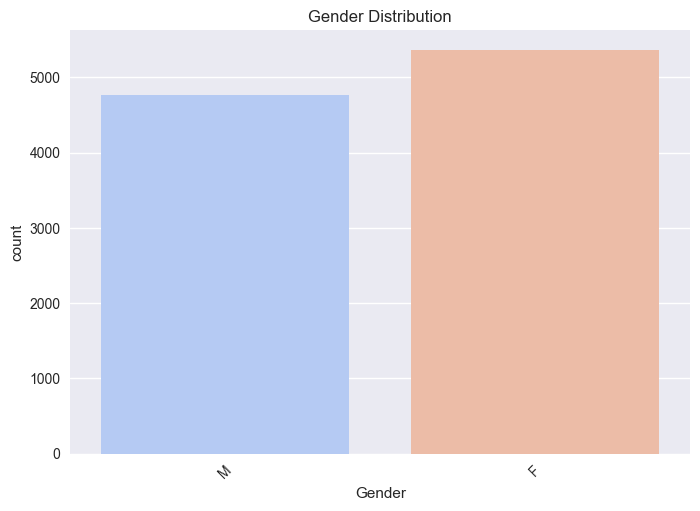


🔹 Education distribution:
Education
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: count, dtype: int64


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_3752\4033644121.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="coolwarm")


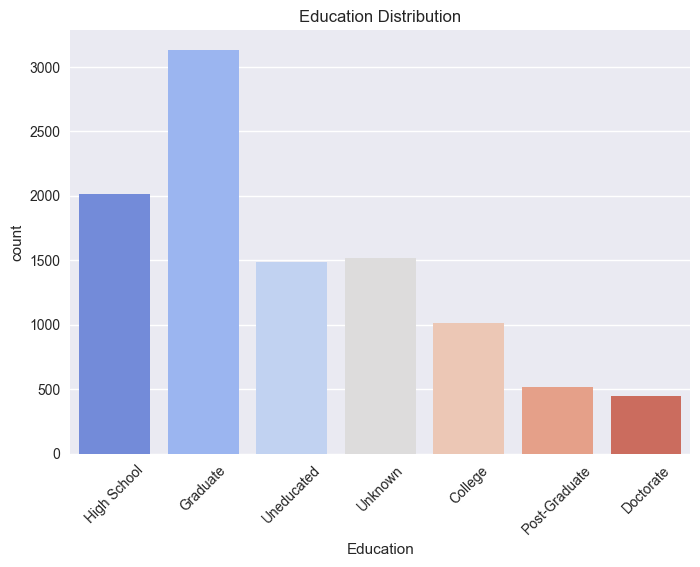


🔹 MaritalStatus distribution:
MaritalStatus
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: count, dtype: int64


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_3752\4033644121.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="coolwarm")


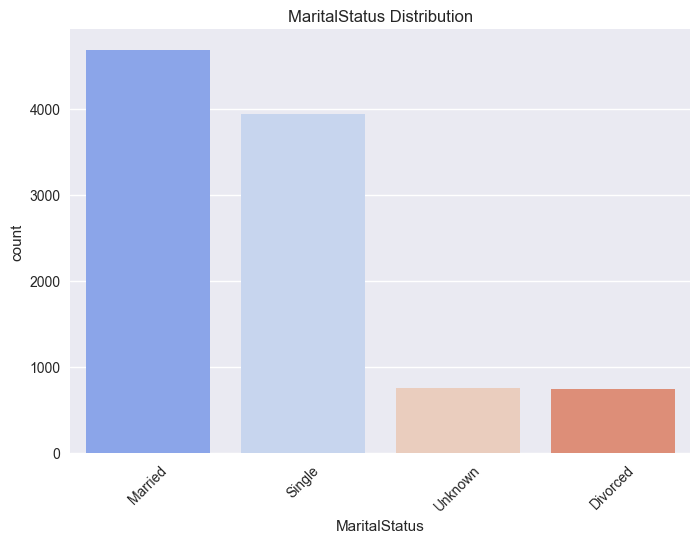


🔹 Income distribution:
Income
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: count, dtype: int64


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_3752\4033644121.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="coolwarm")


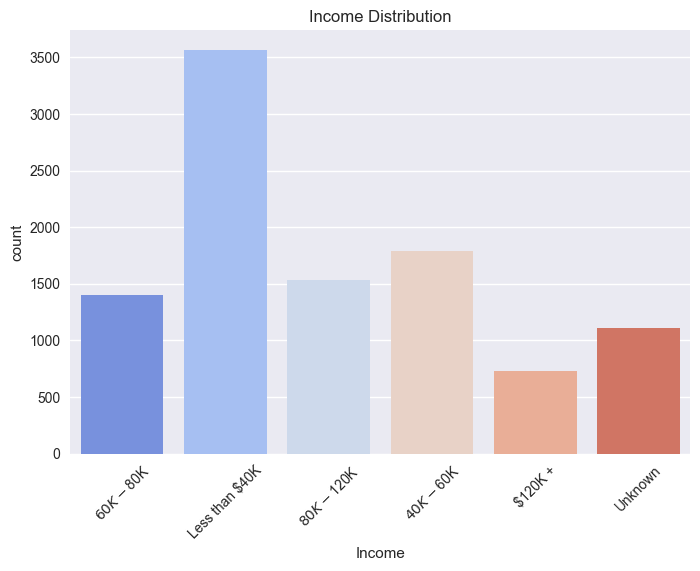


🔹 CardType distribution:
CardType
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: count, dtype: int64


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_3752\4033644121.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="coolwarm")


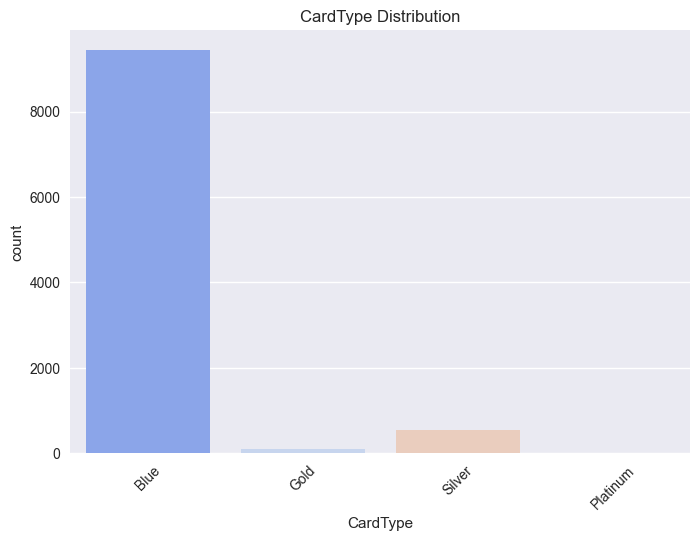

In [4]:
cat_cols = ["Gender","Education","MaritalStatus","Income","CardType"]

for col in cat_cols:
    print(f"\n🔹 {col} distribution:")
    print(df[col].value_counts())
    sns.countplot(data=df, x=col, palette="coolwarm")
    plt.title(f"{col} Distribution")
    plt.xticks(rotation=45)
    plt.show()
    #EXPLORE CATEGORICAL FEATURE


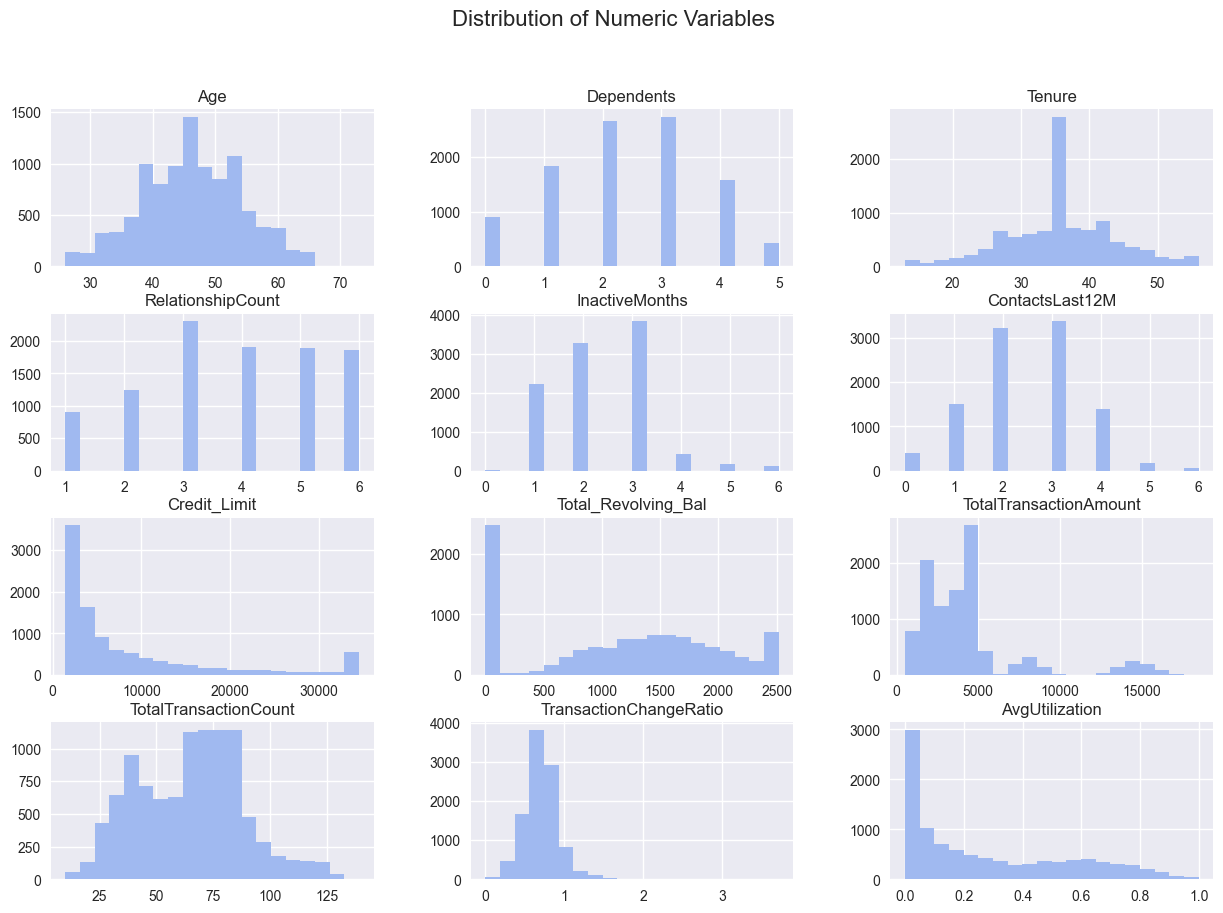

In [5]:
num_cols = [
    "Age", "Dependents", "Tenure", "RelationshipCount",
    "InactiveMonths", "ContactsLast12M", "Credit_Limit",
    "Total_Revolving_Bal", "TotalTransactionAmount",
    "TotalTransactionCount", "TransactionChangeRatio",
    "AvgUtilization"
]

df[num_cols].hist(bins=20, figsize=(15,10), color="#a0b9f0")
plt.suptitle("Distribution of Numeric Variables", fontsize=16)
plt.show()
#EXPLORE NUMERIC FEATURE

In [6]:
# INSPECT COLUMN AND DTYPES
print("Columns:\n", df.columns.tolist(), "\n")
print("Data types:\n", df.dtypes, "\n")
# preview the likely columns
cols = ['TotalTransactionCount','TotalTransactionAmount','Total_Trans_Ct','Total_Trans_Amt',
        'Income','Income_Category','Credit_Limit']
for c in cols:
    if c in df.columns:
        print(f"Sample values for {c} ->")
        display(df[[c]].head(5))


Columns:
 ['Customer_ID', 'Age', 'Gender', 'Dependents', 'Education', 'MaritalStatus', 'Income', 'CardType', 'Tenure', 'RelationshipCount', 'InactiveMonths', 'ContactsLast12M', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'TotalTransactionAmount', 'TotalTransactionCount', 'TransactionChangeRatio', 'AvgUtilization'] 

Data types:
 Customer_ID                 int64
Age                         int64
Gender                     object
Dependents                  int64
Education                  object
MaritalStatus              object
Income                     object
CardType                   object
Tenure                      int64
RelationshipCount           int64
InactiveMonths              int64
ContactsLast12M             int64
Credit_Limit              float64
Total_Revolving_Bal         int64
Avg_Open_To_Buy           float64
Total_Amt_Chng_Q4_Q1      float64
TotalTransactionAmount      int64
TotalTransactionCount       int64
TransactionChangeRa

,TotalTransactionCount
0,42
1,33
2,20
3,20
4,28


Sample values for TotalTransactionAmount ->


,TotalTransactionAmount
0,1144
1,1291
2,1887
3,1171
4,816


Sample values for Income ->


,Income
0,$60K - $80K
1,Less than $40K
2,$80K - $120K
3,Less than $40K
4,$60K - $80K


Sample values for Credit_Limit ->


,Credit_Limit
0,12691.0
1,8256.0
2,3418.0
3,3313.0
4,4716.0


In [7]:
# Convert numeric fields to numbers (coerce errors to NaN)
num_cols = ['TotalTransactionCount','TotalTransactionAmount','Credit_Limit']
for col in num_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Show counts of NaNs
print("NaNs per important column:")
print(df[num_cols].isna().sum())

# Simple imputation (mean) for plotting only
for col in num_cols:
    if col in df.columns:
        df[col].fillna(df[col].median(), inplace=True)


NaNs per important column:
TotalTransactionCount     0
TotalTransactionAmount    0
Credit_Limit              0
dtype: int64


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_3752\3947650633.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_3752\3947650633.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

In [8]:
import plotly.express as px

# choose actual names that exist
x_col = 'TotalTransactionCount'   # we normalized above
y_col = 'TotalTransactionAmount'
size_col = 'Credit_Limit'
color_col = 'Income'              # categorical

# confirm they exist
missing = [c for c in [x_col,y_col,size_col,color_col] if c not in df.columns]
if missing:
    raise ValueError(f"Missing columns for plot: {missing} — check your column names from the inspect step.")

fig = px.scatter(
    df,
    x=x_col,
    y=y_col,
    color=color_col if color_col in df.columns else None,
    size=size_col if size_col in df.columns else None,
    title="Transaction Count vs Amount (colored by Income)",
    hover_data=[c for c in ['Age','CardType','AvgUtilization'] if c in df.columns]
)

# If Plotly doesn't render in VS Code, open in browser:
try:
    fig.show()
except Exception as e:
    print("Plotly renderer failed in notebook, opening in browser instead:", e)
    import plotly.io as pio
    pio.renderers.default = "browser"
    fig.show()
# PLOTY


Plotly renderer failed in notebook, opening in browser instead: Mime type rendering requires nbformat>=4.2.0 but it is not installed


In [9]:
# normalize column names to a safe standard (run this once)
df.columns = [c.strip() for c in df.columns]
rename_map = {}

# map common Kaggle names to our standard
if 'Total_Trans_Ct' in df.columns: rename_map['Total_Trans_Ct'] = 'TotalTransactionCount'
if 'Total_Trans_Amt' in df.columns: rename_map['Total_Trans_Amt'] = 'TotalTransactionAmount'
if 'TotalTransactionCount' in df.columns: rename_map['TotalTransactionCount'] = 'TotalTransactionCount'
if 'TotalTransactionAmount' in df.columns: rename_map['TotalTransactionAmount'] = 'TotalTransactionAmount'
if 'Income_Category' in df.columns: rename_map['Income_Category'] = 'Income'
if 'Income' in df.columns: rename_map['Income'] = 'Income'
if 'Credit_Limit' in df.columns: rename_map['Credit_Limit'] = 'Credit_Limit'

df = df.rename(columns=rename_map)
print("Renamed columns (if any):", rename_map)


Renamed columns (if any): {'TotalTransactionCount': 'TotalTransactionCount', 'TotalTransactionAmount': 'TotalTransactionAmount', 'Income': 'Income', 'Credit_Limit': 'Credit_Limit'}


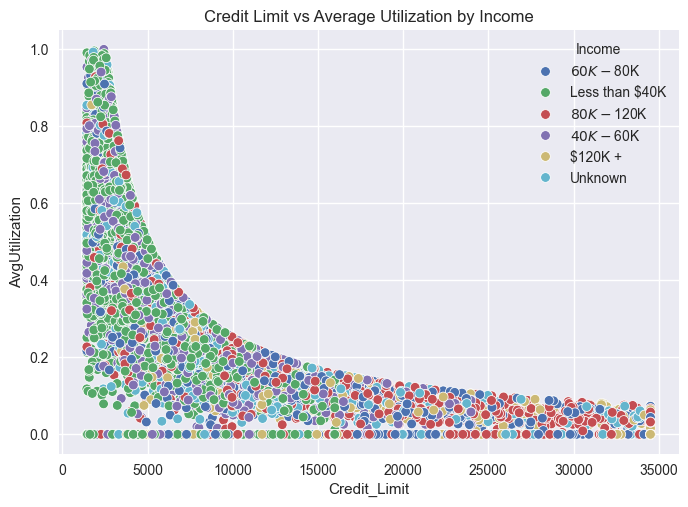

In [ ]:
#credit limit vs utilization
sns.scatterplot(data=df, x="Credit_Limit", y="AvgUtilization", hue="Income")
plt.title("Credit Limit vs Average Utilization by Income")
plt.show()


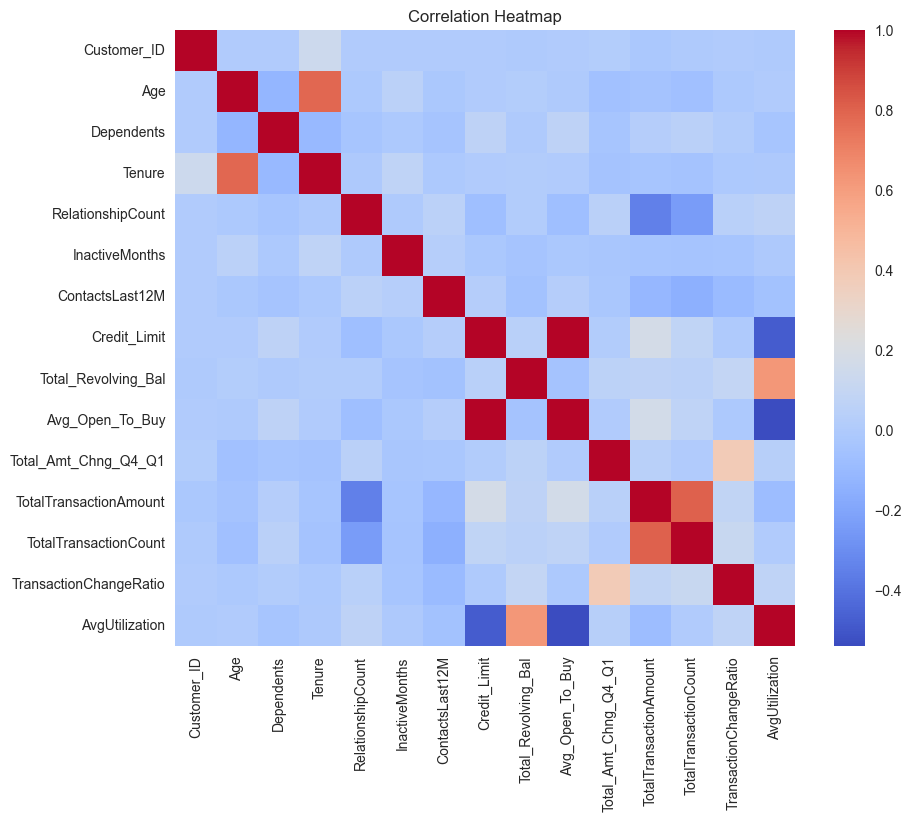

In [ ]:
#correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()
